In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
X_train

array([[242013, True],
       [127920, False],
       [201493, False],
       ...,
       [244453, False],
       [240040, True],
       [167493, False]], dtype=object)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
X_train

array([[ 0.34202876,  1.60356745],
       [-2.62600597, -0.62360956],
       [-0.71206542, -0.62360956],
       ...,
       [ 0.40550334, -0.62360956],
       [ 0.2907028 ,  1.60356745],
       [-1.59654721, -0.62360956]])

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=1)

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
print(y_pred)
print(y_test)

['pop' 'hip hop, pop, R&B' 'pop' 'hip hop, pop, Dance/Electronic'
 'hip hop, pop, R&B' 'latin' 'hip hop, pop, R&B'
 'hip hop, pop, Dance/Electronic' 'hip hop, pop, Dance/Electronic'
 'hip hop, pop' 'hip hop, pop' 'rock' 'hip hop, pop' 'hip hop, pop, R&B'
 'hip hop, pop, R&B' 'World/Traditional, pop, Folk/Acoustic' 'pop'
 'hip hop, pop, Dance/Electronic' 'hip hop' 'rock, pop' 'pop'
 'Dance/Electronic' 'hip hop' 'pop, Dance/Electronic' 'Dance/Electronic'
 'pop' 'hip hop, pop' 'hip hop, pop' 'hip hop, pop, R&B' 'hip hop' 'pop'
 'hip hop, pop, Dance/Electronic' 'hip hop' 'pop' 'hip hop, pop, R&B'
 'hip hop, pop' 'pop' 'hip hop, pop, R&B' 'hip hop' 'hip hop, pop'
 'hip hop' 'pop' 'pop' 'hip hop, pop, Dance/Electronic'
 'pop, Dance/Electronic' 'hip hop, pop' 'hip hop, pop' 'hip hop, pop'
 'hip hop, pop, R&B' 'pop, R&B' 'hip hop, pop, Dance/Electronic'
 'hip hop, pop, R&B' 'pop' 'hip hop, pop' 'hip hop, pop, R&B'
 'hip hop, pop' 'hip hop, pop' 'pop' 'hip hop, pop' 'Dance/Electronic'
 'hip hop

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


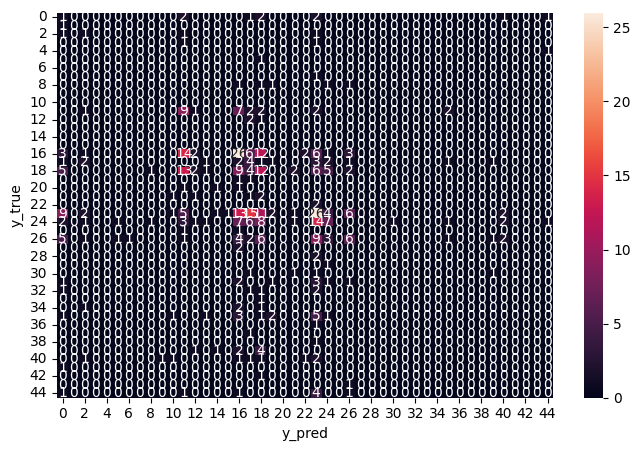

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [12]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

                                       precision    recall  f1-score   support

                     Dance/Electronic       0.03      0.10      0.05        10
                   Folk/Acoustic, pop       0.00      0.00      0.00         1
                                  R&B       0.09      0.25      0.13         4
           World/Traditional, hip hop       0.00      0.00      0.00         2
               World/Traditional, pop       0.00      0.00      0.00         1
World/Traditional, pop, Folk/Acoustic       0.00      0.00      0.00         1
              World/Traditional, rock       0.00      0.00      0.00         0
         World/Traditional, rock, pop       0.00      0.00      0.00         1
                              country       0.00      0.00      0.00         5
                       country, latin       0.00      0.00      0.00         0
                       easy listening       0.00      0.00      0.00         0
                              hip hop       0.17   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

TypeError: ignored

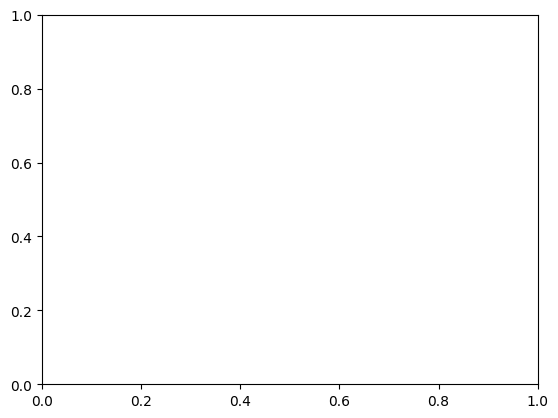

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

TypeError: ignored

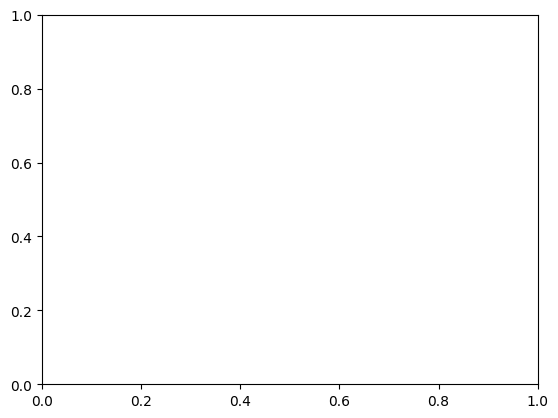

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()